# **Decision Trees**  
### *Drzewa decyzyjne*

---

## **English**

Decision Trees are intuitive, interpretable supervised learning algorithms that make decisions by splitting data into subsets based on feature values. They create a tree-like model of decisions, where each internal node represents a feature test, each branch represents an outcome, and each leaf represents a class label or continuous value.

### **Key Concepts**

1. **Node**: A point where the data is split (decision point)
2. **Leaf**: Terminal node containing the final prediction
3. **Root**: The top node that represents the entire dataset
4. **Branch**: Connection between nodes representing decision outcomes
5. **Depth**: The length of the longest path from root to leaf

### **How Decision Trees Work**

1. **Select Best Feature**: Choose the feature that best separates the data
2. **Split Data**: Divide the dataset based on the selected feature
3. **Recursive Process**: Repeat the process for each subset
4. **Stopping Criteria**: Stop when a criterion is met (max depth, min samples, etc.)

### **Splitting Criteria**

For **Classification**:
- **Gini Impurity**: $Gini = 1 - \sum_{i=1}^{n} p_i^2$
- **Entropy**: $Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i)$
- **Information Gain**: $IG = Entropy_{parent} - \sum \frac{N_{child}}{N_{parent}} \times Entropy_{child}$

For **Regression**:
- **Mean Squared Error (MSE)**: Measures variance reduction
- **Mean Absolute Error (MAE)**: Less sensitive to outliers

### **Advantages**
- **Interpretability**: Easy to understand and visualize
- **No Assumptions**: No assumptions about data distribution
- **Feature Selection**: Automatically performs feature selection
- **Mixed Data Types**: Handles both numerical and categorical features

### **Disadvantages**
- **Overfitting**: Prone to creating overly complex trees
- **Instability**: Small changes in data can create very different trees
- **Bias**: Biased toward features with many levels
- **Linear Relationships**: Difficulty with linear relationships

### **Preventing Overfitting**
- **Pruning**: Remove branches that don't improve performance
- **Max Depth**: Limit tree depth
- **Min Samples Split**: Minimum samples required to split
- **Min Samples Leaf**: Minimum samples required in a leaf

---

## **Polish**

Drzewa decyzyjne to intuicyjne, interpretatywne algorytmy uczenia nadzorowanego, które podejmują decyzje poprzez dzielenie danych na podzbiory na podstawie wartości cech. Tworzą model podobny do drzewa decyzji, gdzie każdy węzeł wewnętrzny reprezentuje test cechy, każda gałąź reprezentuje wynik, a każdy liść reprezentuje etykietę klasy lub wartość ciągłą.

### **Kluczowe pojęcia**

1. **Węzeł**: Punkt, w którym dane są dzielone (punkt decyzyjny)
2. **Liść**: Węzeł końcowy zawierający ostateczną predykcję
3. **Korzeń**: Górny węzeł reprezentujący cały zbiór danych
4. **Gałąź**: Połączenie między węzłami reprezentujące wyniki decyzji
5. **Głębokość**: Długość najdłuższej ścieżki od korzenia do liścia

### **Jak działają drzewa decyzyjne**

1. **Wybór najlepszej cechy**: Wybór cechy, która najlepiej separuje dane
2. **Podział danych**: Podzielenie zbioru danych na podstawie wybranej cechy
3. **Proces rekurencyjny**: Powtarzanie procesu dla każdego podzbioru
4. **Kryteria zatrzymania**: Zatrzymanie gdy spełnione są kryteria (maks. głębokość, min. próbek, itp.)

### **Kryteria podziału**

Dla **Klasyfikacji**:
- **Nieczystość Gini**: $Gini = 1 - \sum_{i=1}^{n} p_i^2$
- **Entropia**: $Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i)$
- **Zysk informacyjny**: $IG = Entropy_{rodzic} - \sum \frac{N_{dziecko}}{N_{rodzic}} \times Entropy_{dziecko}$

Dla **Regresji**:
- **Średni błąd kwadratowy (MSE)**: Mierzy redukcję wariancji
- **Średni błąd bezwzględny (MAE)**: Mniej wrażliwy na wartości odstające

### **Zalety**
- **Interpretowalność**: Łatwe do zrozumienia i wizualizacji
- **Brak założeń**: Brak założeń dotyczących rozkładu danych
- **Selekcja cech**: Automatycznie wykonuje selekcję cech
- **Mieszane typy danych**: Obsługuje zarówno cechy numeryczne, jak i kategoryczne

### **Wady**
- **Przeuczenie**: Skłonność do tworzenia zbyt złożonych drzew
- **Niestabilność**: Małe zmiany w danych mogą tworzyć bardzo różne drzewa
- **Obciążenie**: Obciążone w kierunku cech z wieloma poziomami
- **Relacje liniowe**: Trudności z relacjami liniowymi

### **Zapobieganie przeuczeniu**
- **Przycinanie**: Usuwanie gałęzi, które nie poprawiają wydajności
- **Maks. głębokość**: Ograniczenie głębokości drzewa
- **Min. próbek do podziału**: Minimalna liczba próbek wymagana do podziału
- **Min. próbek w liściu**: Minimalna liczba próbek wymagana w liściu


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.datasets import make_classification, make_regression, load_iris, load_wine
import seaborn as sns

# Basic Decision Tree for Classification
# Podstawowe drzewo decyzyjne dla klasyfikacji
print("=== Classification Example | Przykład klasyfikacji ===\n")

# Generate a binary classification dataset
# Generowanie zbioru danych dla klasyfikacji binarnej
np.random.seed(42)
X_class, y_class = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                      n_informative=2, n_clusters_per_class=1,
                                      class_sep=1.5, random_state=42)

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Create decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train_c, y_train_c)

# Make predictions
y_pred_c = dt_classifier.predict(X_test_c)
accuracy = accuracy_score(y_test_c, y_pred_c)

print(f"Classification Accuracy | Dokładność klasyfikacji: {accuracy:.3f}")
print(f"Tree depth | Głębokość drzewa: {dt_classifier.get_depth()}")
print(f"Number of leaves | Liczba liści: {dt_classifier.get_n_leaves()}")

# Feature importance
feature_importance = dt_classifier.feature_importances_
print(f"\nFeature Importance | Ważność cech:")
for i, importance in enumerate(feature_importance):
    print(f"  Feature {i+1}: {importance:.3f}")

print("\nClassification Report | Raport klasyfikacji:")
print(classification_report(y_test_c, y_pred_c))


=== Classification Example | Przykład klasyfikacji ===

Classification Accuracy | Dokładność klasyfikacji: 0.980
Tree depth | Głębokość drzewa: 5
Number of leaves | Liczba liści: 16

Feature Importance | Ważność cech:
  Feature 1: 0.054
  Feature 2: 0.946

Classification Report | Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       104
           1       0.97      0.99      0.98        96

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



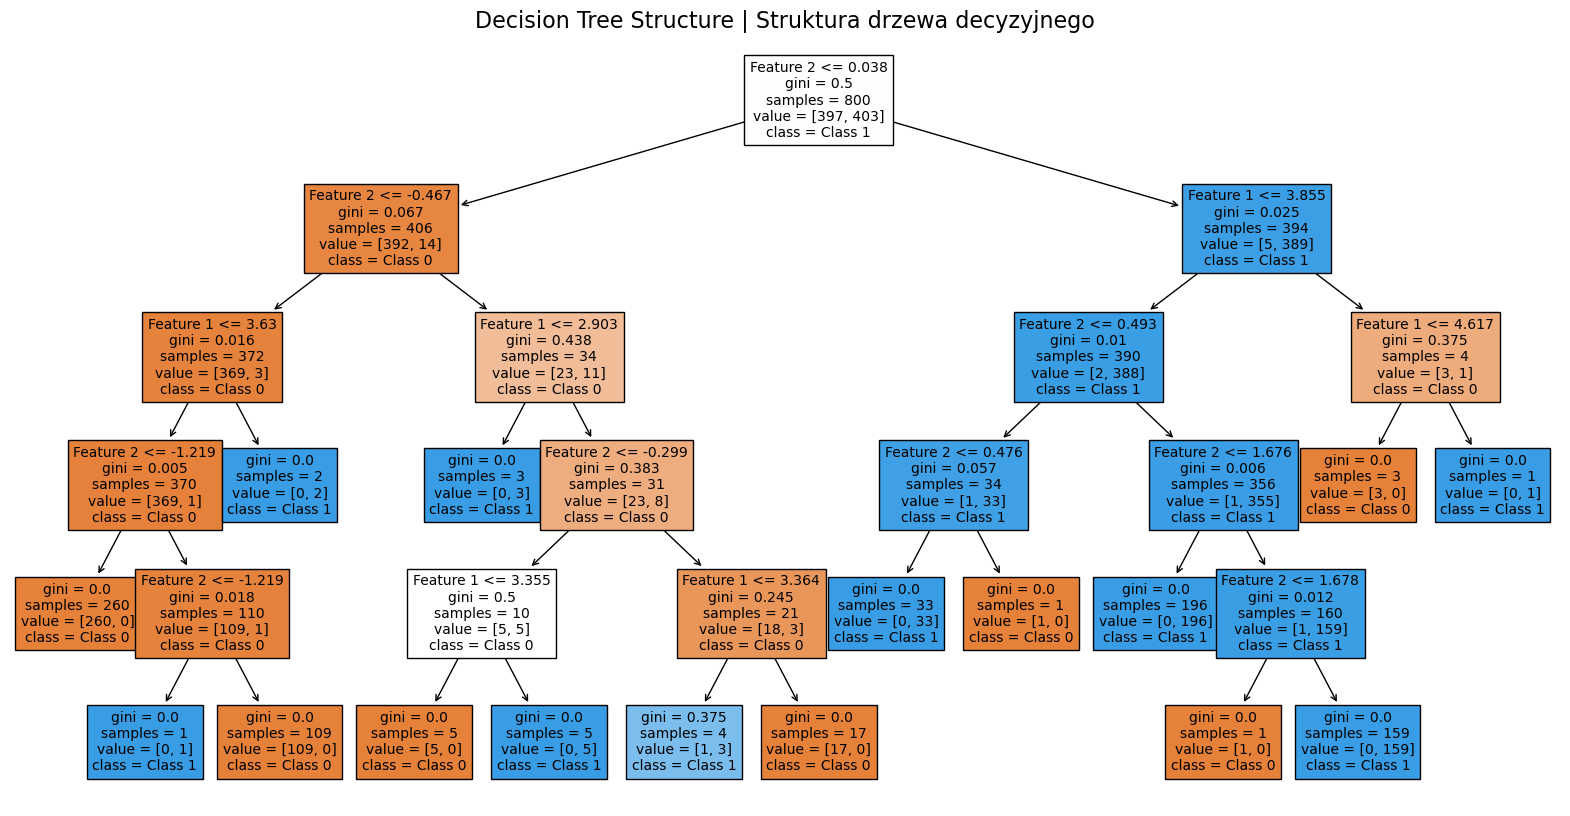

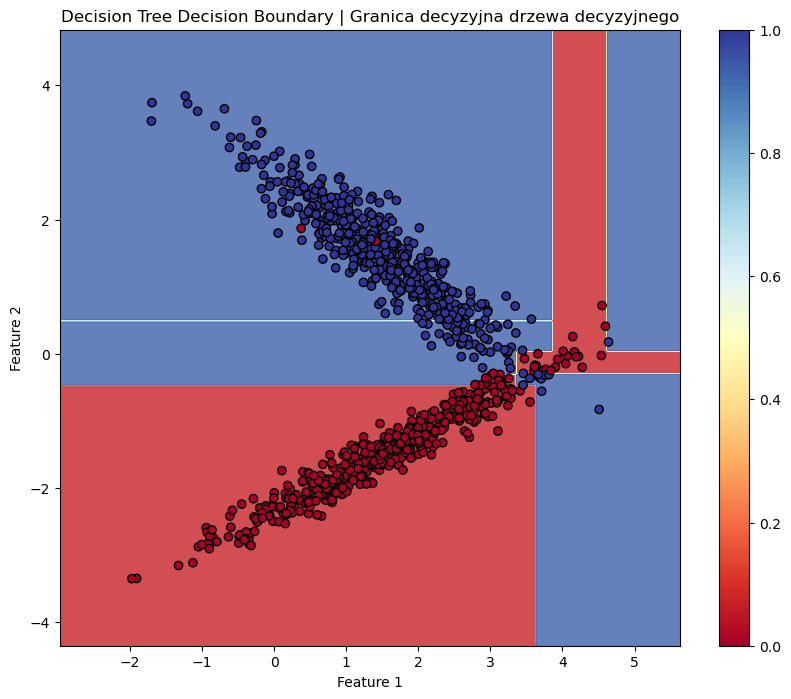

In [2]:
# Visualize Decision Tree Structure
# Wizualizacja struktury drzewa decyzyjnego

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          filled=True,  
          feature_names=[f'Feature {i+1}' for i in range(X_class.shape[1])],
          class_names=['Class 0', 'Class 1'],
          fontsize=10)
plt.title("Decision Tree Structure | Struktura drzewa decyzyjnego", fontsize=16)
plt.show()

# Decision Boundary Visualization
# Wizualizacja granicy decyzyjnej
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(10, 8))
    
    # Create a mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    
    # Plot the data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_class, y_class, dt_classifier, 
                      "Decision Tree Decision Boundary | Granica decyzyjna drzewa decyzyjnego")



=== Overfitting Analysis | Analiza przeuczenia ===

Max Depth  1: Train=0.976, Test=0.975
Max Depth  3: Train=0.986, Test=0.970
Max Depth  5: Train=0.999, Test=0.980
Max Depth 10: Train=1.000, Test=0.975
Max Depth 20: Train=1.000, Test=0.975


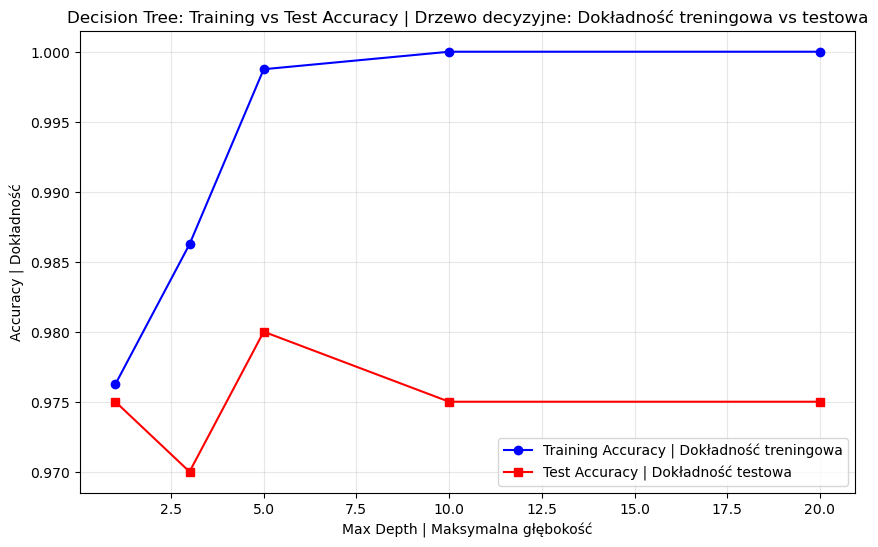


Best max_depth for test accuracy | Najlepsza max_depth dla dokładności testowej: 5
Test accuracy at best depth | Dokładność testowa dla najlepszej głębokości: 0.980


In [3]:
# Overfitting vs Proper Regularization
# Przeuczenie vs odpowiednia regularyzacja

print("\n=== Overfitting Analysis | Analiza przeuczenia ===\n")

# Create trees with different depths
depths = [1, 3, 5, 10, 20]
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_c, y_train_c)
    
    train_pred = dt.predict(X_train_c)
    test_pred = dt.predict(X_test_c)
    
    train_accuracy = accuracy_score(y_train_c, train_pred)
    test_accuracy = accuracy_score(y_test_c, test_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    
    print(f"Max Depth {depth:2d}: Train={train_accuracy:.3f}, Test={test_accuracy:.3f}")

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training Accuracy | Dokładność treningowa', color='blue')
plt.plot(depths, test_scores, 's-', label='Test Accuracy | Dokładność testowa', color='red')
plt.xlabel('Max Depth | Maksymalna głębokość')
plt.ylabel('Accuracy | Dokładność')
plt.title('Decision Tree: Training vs Test Accuracy | Drzewo decyzyjne: Dokładność treningowa vs testowa')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Identify overfitting
best_depth_idx = np.argmax(test_scores)
best_depth = depths[best_depth_idx]
print(f"\nBest max_depth for test accuracy | Najlepsza max_depth dla dokładności testowej: {best_depth}")
print(f"Test accuracy at best depth | Dokładność testowa dla najlepszej głębokości: {test_scores[best_depth_idx]:.3f}")



=== Regression Example | Przykład regresji ===

Regression MSE | MSE regresji: 0.139
Regression R² | R² regresji: 0.946
Tree depth | Głębokość drzewa: 5
Number of leaves | Liczba liści: 31


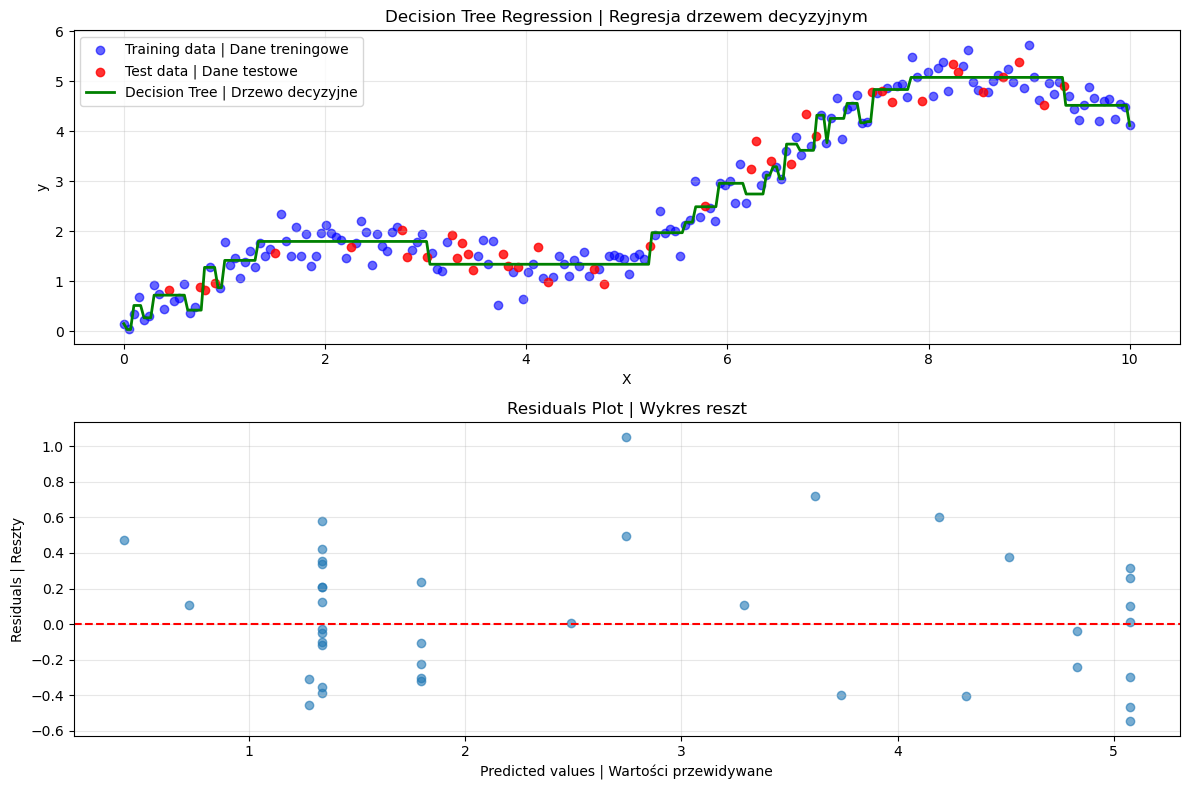

In [4]:
# Decision Tree for Regression
# Drzewo decyzyjne dla regresji

print("\n=== Regression Example | Przykład regresji ===\n")

# Generate regression dataset
np.random.seed(42)
X_reg = np.linspace(0, 10, 200).reshape(-1, 1)
y_reg = 0.5 * X_reg.ravel() + np.sin(X_reg.ravel()) + 0.3 * np.random.randn(200)

# Split the data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create decision tree regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train_r, y_train_r)

# Make predictions
y_pred_r = dt_regressor.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print(f"Regression MSE | MSE regresji: {mse:.3f}")
print(f"Regression R² | R² regresji: {r2:.3f}")
print(f"Tree depth | Głębokość drzewa: {dt_regressor.get_depth()}")
print(f"Number of leaves | Liczba liści: {dt_regressor.get_n_leaves()}")

# Visualize regression results
plt.figure(figsize=(12, 8))

# Sort data for plotting
sort_idx = np.argsort(X_test_r.ravel())
X_test_sorted = X_test_r[sort_idx]
y_test_sorted = y_test_r[sort_idx]
y_pred_sorted = y_pred_r[sort_idx]

plt.subplot(2, 1, 1)
plt.scatter(X_train_r, y_train_r, alpha=0.6, color='blue', label='Training data | Dane treningowe')
plt.scatter(X_test_r, y_test_r, alpha=0.8, color='red', label='Test data | Dane testowe')

# Plot prediction line
X_plot = np.linspace(0, 10, 300).reshape(-1, 1)
y_plot = dt_regressor.predict(X_plot)
plt.plot(X_plot, y_plot, color='green', linewidth=2, label='Decision Tree | Drzewo decyzyjne')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Tree Regression | Regresja drzewem decyzyjnym')
plt.legend()
plt.grid(True, alpha=0.3)

# Residuals plot
plt.subplot(2, 1, 2)
residuals = y_test_r - y_pred_r
plt.scatter(y_pred_r, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values | Wartości przewidywane')
plt.ylabel('Residuals | Reszty')
plt.title('Residuals Plot | Wykres reszt')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



=== Real-world Example: Wine Dataset | Przykład ze świata rzeczywistego: Zbiór danych Wine ===

Wine Classification Accuracy | Dokładność klasyfikacji wina: 0.944
Number of features | Liczba cech: 13
Number of classes | Liczba klas: 3
Class names | Nazwy klas: ['class_0' 'class_1' 'class_2']

Detailed Classification Report | Szczegółowy raport klasyfikacji:
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Top 10 Most Important Features | 10 najważniejszych cech:
 1. flavanoids               : 0.4353
 2. color_intensity          : 0.4076
 3. proline                  : 0.1571
 4. od280/od315_of_diluted_wines: 0.0000
 5. hue                      : 0.0000
 6. pr

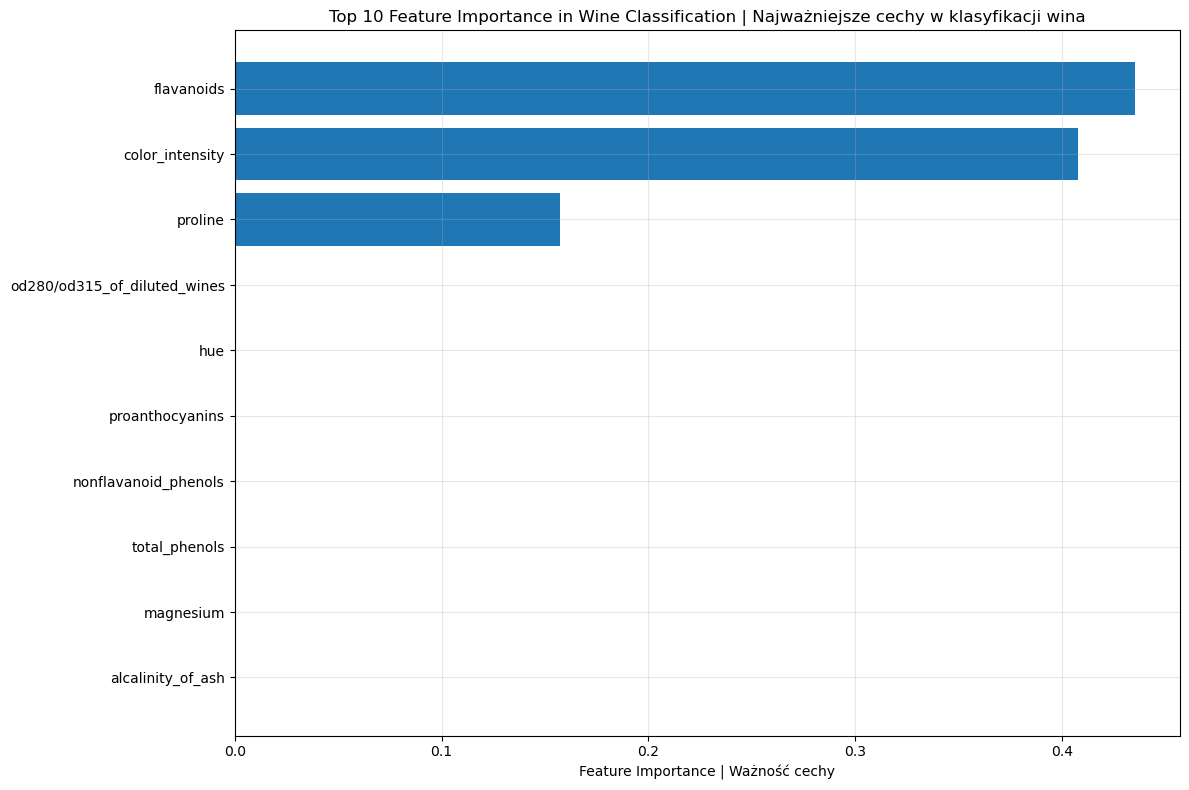

In [5]:
# Real-world example: Wine Quality Classification
# Przykład ze świata rzeczywistego: Klasyfikacja jakości wina

print("\n=== Real-world Example: Wine Dataset | Przykład ze świata rzeczywistego: Zbiór danych Wine ===\n")

# Load wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Split the data
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Create decision tree with pruning parameters
dt_wine = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_wine.fit(X_train_w, y_train_w)

# Make predictions
y_pred_w = dt_wine.predict(X_test_w)
accuracy_wine = accuracy_score(y_test_w, y_pred_w)

print(f"Wine Classification Accuracy | Dokładność klasyfikacji wina: {accuracy_wine:.3f}")
print(f"Number of features | Liczba cech: {X_wine.shape[1]}")
print(f"Number of classes | Liczba klas: {len(wine.target_names)}")
print(f"Class names | Nazwy klas: {wine.target_names}")

print("\nDetailed Classification Report | Szczegółowy raport klasyfikacji:")
print(classification_report(y_test_w, y_pred_w, target_names=wine.target_names))

# Feature importance analysis
feature_importance_wine = dt_wine.feature_importances_
feature_names = wine.feature_names

# Sort features by importance
importance_indices = np.argsort(feature_importance_wine)[::-1]

print(f"\nTop 10 Most Important Features | 10 najważniejszych cech:")
for i in range(min(10, len(feature_names))):
    idx = importance_indices[i]
    print(f"{i+1:2d}. {feature_names[idx]:<25}: {feature_importance_wine[idx]:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = 10
indices = importance_indices[:top_features]

plt.barh(range(top_features), feature_importance_wine[indices])
plt.yticks(range(top_features), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance | Ważność cechy')
plt.title(f'Top {top_features} Feature Importance in Wine Classification | Najważniejsze cechy w klasyfikacji wina')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
